<Figure size 1000x800 with 0 Axes>

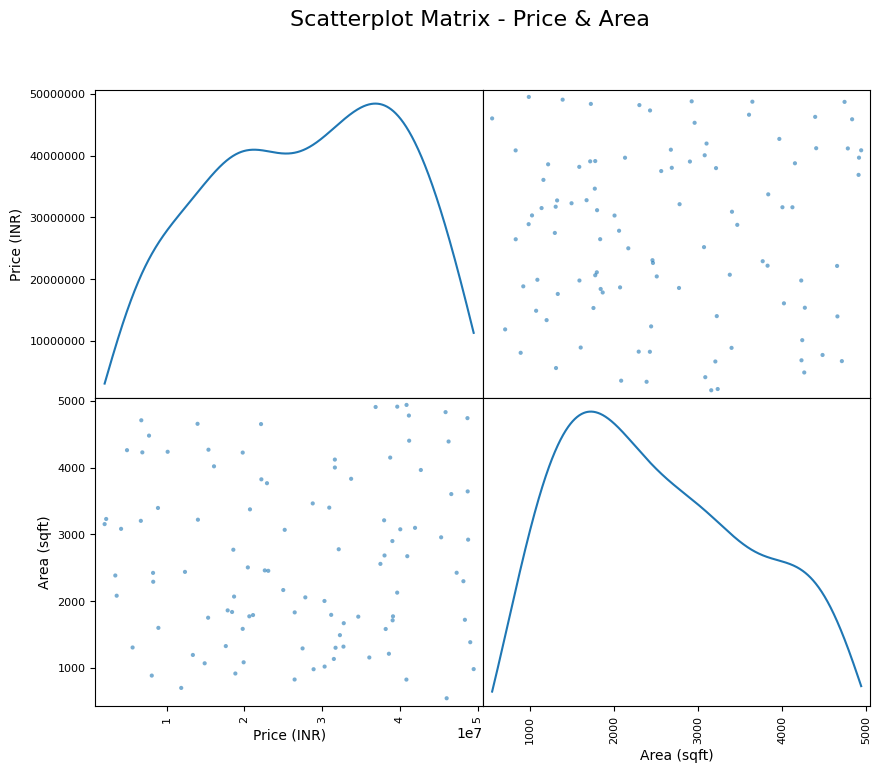

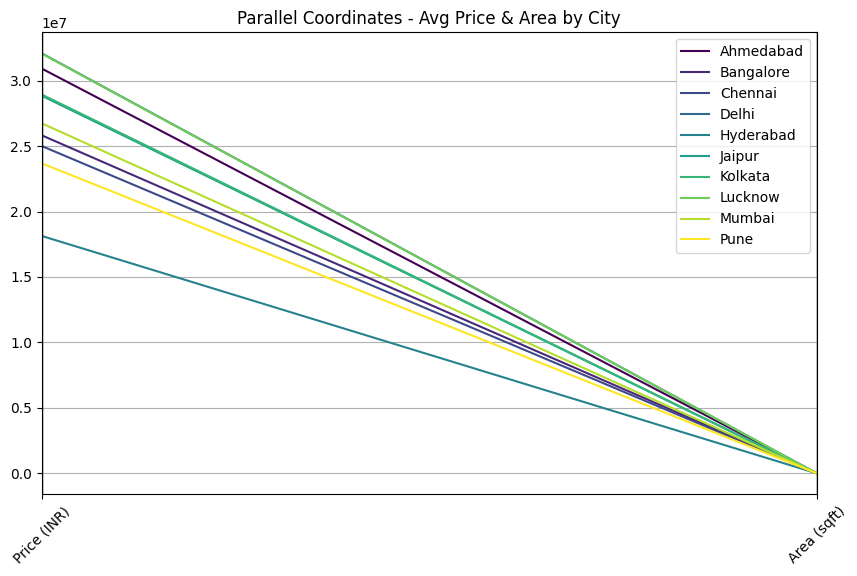

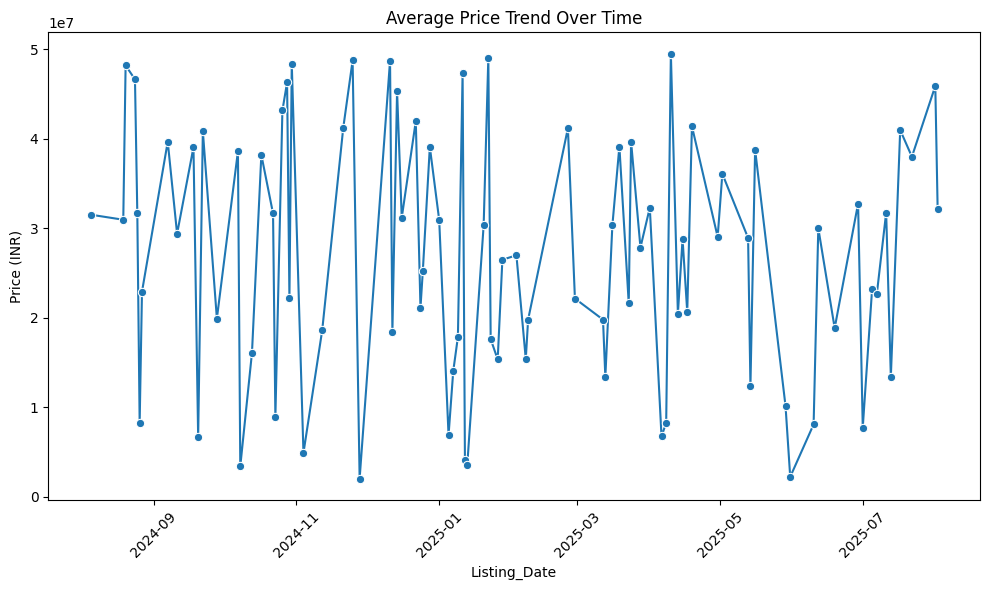

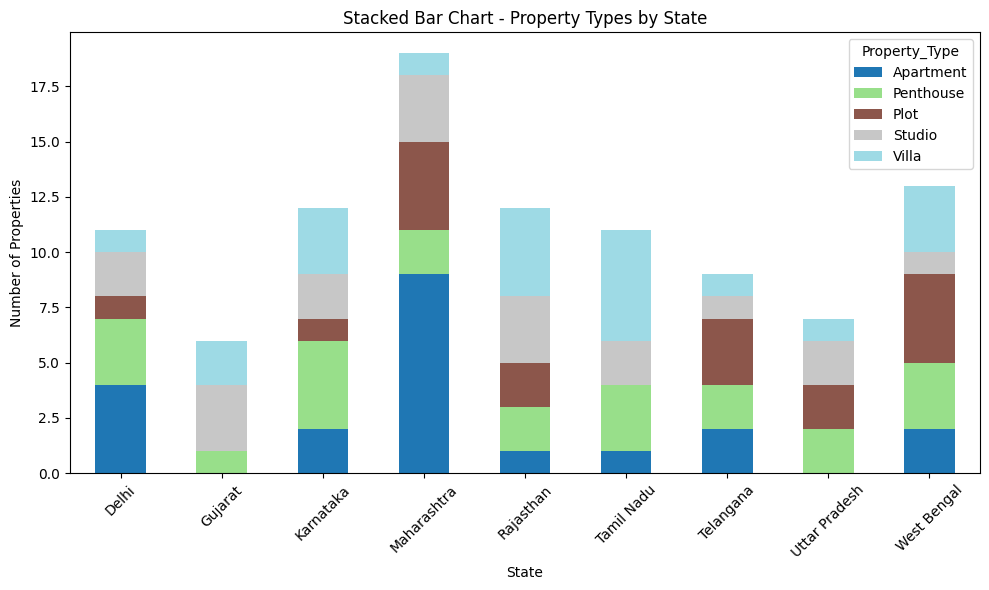

In [ ]:
# Task 4: Multivariate Analysis on Real Estate Dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix, parallel_coordinates

# Read dataset (upload in Colab before running)
df = pd.read_csv("/content/real_estate_listings_100.csv")

# Ensure date is in datetime format
df['Listing_Date'] = pd.to_datetime(df['Listing_Date'], errors='coerce')

# --- SCATTERPLOT MATRIX ---
plt.figure(figsize=(10, 8))
scatter_matrix(df[['Price (INR)', 'Area (sqft)']], figsize=(10, 8), diagonal='kde', alpha=0.6)
plt.suptitle("Scatterplot Matrix - Price & Area", fontsize=16)
plt.show()

# --- PARALLEL COORDINATES ---
# For parallel coordinates, we need categorical variable + numeric measures
# Let's group cities with average prices and areas
sample_df = df.groupby('City').agg({'Price (INR)': 'mean', 'Area (sqft)': 'mean'}).reset_index()
plt.figure(figsize=(10, 6))
parallel_coordinates(sample_df, 'City', colormap='viridis')
plt.title("Parallel Coordinates - Avg Price & Area by City")
plt.xticks(rotation=45)
plt.show()

# --- LINE GRAPH ---
# Average price trend over time
price_trend = df.groupby('Listing_Date')['Price (INR)'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(data=price_trend, x='Listing_Date', y='Price (INR)', marker="o")
plt.title("Average Price Trend Over Time")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# --- STACKED BAR CHART ---
# Count of Property Types per State
stack_data = df.groupby(['State', 'Property_Type']).size().unstack(fill_value=0)
stack_data.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='tab20')
plt.title("Stacked Bar Chart - Property Types by State")
plt.ylabel("Number of Properties")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
